In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from numba.experimental import jitclass
from numba import njit
import dim_one_sim  

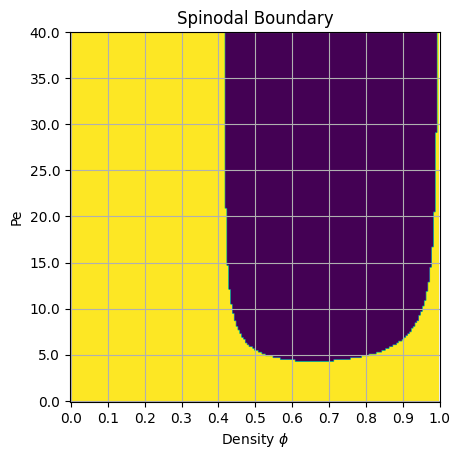

In [16]:
def d_s(rho):
    alpha = np.pi/2 -1
    beta = alpha*(2*alpha-1)/(2*alpha+1)
    return (1-rho)*(1-alpha*rho + beta*rho**2)

def d_s_prime(rho):
    alpha = np.pi/2 -1
    beta = alpha*(2*alpha-1)/(2*alpha+1)
    return -(alpha+1)+2*(alpha+beta)*rho -3*beta*rho**2

L=20.0
omega = 2*np.pi/L

def a(phi):
    return -d_s(phi)*(omega)**2

def b(phi, Pe):
    return -Pe/2*1.0j*(omega)*d_s(phi)

def W(phi, Pe):
    W = np.array([
        [-(omega)**2, -Pe/2*1.0j*(omega)*(1-phi), 0, 0, 0, 0, 0, 0],
        [2*b(phi, Pe) - Pe*1.0j*omega*phi*d_s_prime(phi), a(phi)-1, b(phi, Pe), 0, 0, 0, 0, 0],
        [0, b(phi, Pe), a(phi) - 4, b(phi, Pe), 0, 0, 0, 0],
        [0, 0, b(phi, Pe), a(phi) - 9, b(phi, Pe), 0, 0, 0],
        [0, 0, 0, b(phi, Pe), a(phi) - 16, b(phi, Pe), 0, 0],
        [0, 0, 0, 0, b(phi, Pe), a(phi) - 25, b(phi, Pe), 0],
        [0, 0, 0, 0, 0, b(phi, Pe), a(phi) - 36, 0],
        [0, 0, 0, 0, 0, 0, b(phi, Pe), a(phi) - 49]
    ])
    return W

def stability(phi, Pe):
    W_ = W(phi, Pe)
    eigenvalues = np.linalg.eigvals(W_)
    largest_real_part = np.max(eigenvalues.real)
    if largest_real_part > 0.0:
        return 0.0
    else:
        return 1.0
    
stability_picture = np.array([[stability(phi, Pe) for phi in np.linspace(0, 1, 200)] for Pe in np.linspace(0, 40, 200)])

plt.imshow(stability_picture, origin='lower')
plt.xticks([])
plt.yticks(np.linspace(0, 200, 9), labels=np.linspace(0, 40, 9))
plt.xticks(np.linspace(0, 200, 11), labels=np.round(np.linspace(0, 1.0, 11), 3))
plt.xlabel(r'Density $\phi$')
plt.ylabel(r'Pe')
plt.title('Spinodal Boundary')
plt.grid()
plt.show()